# Kaggle Datset Download

In [1]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
#from zipfile import ZipFile
#zf = ZipFile(r"C:\Users\chanu\covid19-in-india.zip")
#zf.extractall(r'C:\Users\chanu\covid1')
#zf.close()

In [3]:
#importing require packages

from pathlib import Path
from sklearn import linear_model
import requests
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy import ravel
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [4]:
#Using File-caching,downloading csv file

file_name = cache_file(
    "COVID-19DEC",
    "https://prsindia.org/covid-19/cases/download",
)
    
df = pd.read_csv(file_name)

In [5]:
print(df.tail(100))

      S. No.        Date Region  Confirmed Cases  Active Cases  \
9557    9558  03/08/2020  World         17918582      17231879   
9558    9559  04/08/2020  World         18142718      17451705   
9559    9560  05/08/2020  World         18354342      17658195   
9560    9561  06/08/2020  World         18614177      17911535   
9561    9562  07/08/2020  World         18902735      18193224   
...      ...         ...    ...              ...           ...   
9652    9653  26/11/2020  World         60074174      58657882   
9653    9654  30/11/2020  World         62363527      60906840   
9654    9655  01/12/2020  World         62844837      61379693   
9655    9656  02/12/2020  World         63360234      61884409   
9656    9657  03/12/2020  World         63965092      62476972   

      Cured/Discharged      Death  
9557               NaN   686703.0  
9558               NaN   691013.0  
9559               NaN   696147.0  
9560               NaN   702642.0  
9561               NaN   70

# DATA Cleaning/Wrangling

In [6]:
df.columns

Index(['S. No.', 'Date', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [7]:
df[df['Date']=='19/08/2020']

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
160,161,19/08/2020,India,2767273,676514,2037870.0,52889.0
413,414,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0
681,682,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0
927,928,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0
1174,1175,19/08/2020,Assam,82201,23704,58294.0,203.0
1432,1433,19/08/2020,Bihar,109498,28692,80330.0,476.0
1693,1694,19/08/2020,Chandigarh,2305,1032,1243.0,30.0
1953,1954,19/08/2020,Chhattisgarh,16833,5828,10847.0,158.0
2163,2164,19/08/2020,Dadra and Nagar Haveli and Daman and Diu,1951,425,1524.0,2.0
2431,2432,19/08/2020,Delhi,154741,11068,139447.0,4226.0


#Merging Population Census file

In [8]:
df1=pd.read_csv(r'C:\Users\chanu\Downloads\covid\population_india_census2011.csv')

In [9]:
df1.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [10]:
#Apply join on two dataframes into new dataframe

dfm=pd.merge(df, df1, how='inner', on=None, left_on='Region', right_on='State / Union Territory',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [11]:
dfm[dfm['Date']=='19/08/2020']

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
145,414,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0,34,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
413,682,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
659,928,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0,26,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
906,1175,19/08/2020,Assam,82201,23704,58294.0,203.0,15,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
1164,1433,19/08/2020,Bihar,109498,28692,80330.0,476.0,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
1425,1694,19/08/2020,Chandigarh,2305,1032,1243.0,30.0,32,Chandigarh,1055450,28991,1026459,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
1685,1954,19/08/2020,Chhattisgarh,16833,5828,10847.0,158.0,17,Chhattisgarh,25545198,19607961,5937237,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
1895,2164,19/08/2020,Dadra and Nagar Haveli and Daman and Diu,1951,425,1524.0,2.0,33,Dadra and Nagar Haveli and Daman and Diu,585764,243510,342254,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
2163,2432,19/08/2020,Delhi,154741,11068,139447.0,4226.0,29,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868
2417,2686,19/08/2020,Goa,12333,3861,8356.0,116.0,25,Goa,1458545,551731,906814,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973


In [12]:
#Dropiing Duplicate columns
dfm=dfm.drop(['Sno','S. No.','State / Union Territory'],axis=1)

In [13]:
dfm[dfm['Date']=='19/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area,Density,Gender Ratio
145,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
413,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
659,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
906,19/08/2020,Assam,82201,23704,58294.0,203.0,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
1164,19/08/2020,Bihar,109498,28692,80330.0,476.0,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
1425,19/08/2020,Chandigarh,2305,1032,1243.0,30.0,1055450,28991,1026459,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
1685,19/08/2020,Chhattisgarh,16833,5828,10847.0,158.0,25545198,19607961,5937237,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
1895,19/08/2020,Dadra and Nagar Haveli and Daman and Diu,1951,425,1524.0,2.0,585764,243510,342254,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
2163,19/08/2020,Delhi,154741,11068,139447.0,4226.0,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868
2417,19/08/2020,Goa,12333,3861,8356.0,116.0,1458545,551731,906814,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973


In [14]:
dfm.dtypes

Date                 object
Region               object
Confirmed Cases       int64
Active Cases          int64
Cured/Discharged    float64
Death               float64
Population            int64
Rural population      int64
Urban population      int64
Area                 object
Density              object
Gender Ratio          int64
dtype: object

In [15]:
#String Manipulation in two columns by removing certain part in strings 

In [16]:
dfm['Density']=dfm['Density'].str.replace(r"\(.*\)","")
dfm['Density']=dfm['Density'].str.replace(',','')
dfm['Density']=dfm['Density'].str.replace('/km2','')

In [17]:
dfm['Area']=dfm['Area'].str.replace(r"\(.*\)","")
dfm['Area']=dfm['Area'].str.replace(',','')
dfm['Area']=dfm['Area'].str.replace('km2','')

In [18]:
dfm=dfm.rename(columns={"Area": "Area_in_km", "Density": "Density_in_sqkm"})

In [19]:
dfm[dfm['Date']=='19/08/2020'].head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area_in_km,Density_in_sqkm,Gender Ratio
145,19/08/2020,Andaman and Nicobar Islands,2529,1078,1421.0,30.0,380581,237093,143488,8249,46,876
413,19/08/2020,Andhra Pradesh,306261,85130,218311.0,2820.0,49577103,34966693,14610410,162968,303,993
659,19/08/2020,Arunachal Pradesh,2875,921,1949.0,5.0,1383727,1066358,317369,83743,17,938
906,19/08/2020,Assam,82201,23704,58294.0,203.0,31205576,26807034,4398542,78438,397,954
1164,19/08/2020,Bihar,109498,28692,80330.0,476.0,104099452,92341436,11758016,94163,1102,918


In [20]:
dfm.dtypes

Date                 object
Region               object
Confirmed Cases       int64
Active Cases          int64
Cured/Discharged    float64
Death               float64
Population            int64
Rural population      int64
Urban population      int64
Area_in_km           object
Density_in_sqkm      object
Gender Ratio          int64
dtype: object

In [21]:
#Converting Datatypes

In [22]:
dfm['Area_in_km']=dfm['Area_in_km'].astype('int64')
dfm['Cured/Discharged']=dfm['Cured/Discharged'].astype('int64')
dfm['Death']=dfm['Death'].astype('int64')

In [23]:
dfm['Density_in_sqkm']=dfm['Density_in_sqkm'].astype(float)

In [24]:
dfm['Date'] = pd.to_datetime(dfm['Date'],format='%d/%m/%Y')

In [25]:
dfm.dtypes

Date                datetime64[ns]
Region                      object
Confirmed Cases              int64
Active Cases                 int64
Cured/Discharged             int64
Death                        int64
Population                   int64
Rural population             int64
Urban population             int64
Area_in_km                   int64
Density_in_sqkm            float64
Gender Ratio                 int64
dtype: object

#Data Cleaning on Hospital File

In [26]:
dfq=pd.read_csv(r'C:\Users\chanu\Downloads\covid\HospitalBedsIndia.csv')

In [27]:
dfq

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [28]:
dfq=dfq.fillna(0)
dfq=dfq.drop('Sno',axis=1)

In [29]:
dfq.dtypes

State/UT                             object
NumPrimaryHealthCenters_HMIS         object
NumCommunityHealthCenters_HMIS        int64
NumSubDistrictHospitals_HMIS        float64
NumDistrictHospitals_HMIS             int64
TotalPublicHealthFacilities_HMIS      int64
NumPublicBeds_HMIS                    int64
NumRuralHospitals_NHP18               int64
NumRuralBeds_NHP18                    int64
NumUrbanHospitals_NHP18               int64
NumUrbanBeds_NHP18                    int64
dtype: object

In [30]:
#String Manipulation

In [31]:
dfq['NumPrimaryHealthCenters_HMIS']=dfq['NumPrimaryHealthCenters_HMIS'].str.replace(',','')

In [32]:
dfq['NumPrimaryHealthCenters_HMIS']=pd.to_numeric(dfq.NumPrimaryHealthCenters_HMIS)

In [33]:
dfq.dtypes

State/UT                             object
NumPrimaryHealthCenters_HMIS          int64
NumCommunityHealthCenters_HMIS        int64
NumSubDistrictHospitals_HMIS        float64
NumDistrictHospitals_HMIS             int64
TotalPublicHealthFacilities_HMIS      int64
NumPublicBeds_HMIS                    int64
NumRuralHospitals_NHP18               int64
NumRuralBeds_NHP18                    int64
NumUrbanHospitals_NHP18               int64
NumUrbanBeds_NHP18                    int64
dtype: object

In [34]:
#String Conversion

In [35]:
dfq['NumSubDistrictHospitals_HMIS']=dfq['NumSubDistrictHospitals_HMIS'].astype(int)

In [36]:
dfq

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0
9,Delhi,534,25,9,47,615,20572,0,0,109,24383


In [37]:
#Taking Column Names into List

In [38]:
columnDF=dfq.columns.tolist()

In [39]:
print(columnDF)

['State/UT', 'NumPrimaryHealthCenters_HMIS', 'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS', 'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18', 'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18']


In [40]:
#Calculating Sum on Row Using List Slicing and Sum Function

In [41]:
dfq["Total_Beds"] = dfq[columnDF[1:]].sum(axis=1)

In [42]:
dfq

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Beds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500,2419
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658,87527
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268,5340
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198,39923
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,35140
5,Chandigarh,40,2,1,4,47,3756,0,0,4,778,4632
6,Chhattisgarh,813,166,12,32,1023,14354,169,5070,45,4342,26026
7,Dadra & Nagar Haveli,9,2,1,1,13,568,10,273,1,316,1194
8,Daman & Diu,4,2,0,2,8,298,5,240,0,0,559
9,Delhi,534,25,9,47,615,20572,0,0,109,24383,46294


In [43]:
#Making new dataframe with reqd columns(Total Sum of beds)

In [44]:
dfq=dfq[['State/UT','Total_Beds']]

In [45]:
dfq

,State/UT,Total_Beds
0,Andaman & Nicobar Islands,2419
1,Andhra Pradesh,87527
2,Arunachal Pradesh,5340
3,Assam,39923
4,Bihar,35140
5,Chandigarh,4632
6,Chhattisgarh,26026
7,Dadra & Nagar Haveli,1194
8,Daman & Diu,559
9,Delhi,46294


# Merging dataframes into new Dataframe

In [46]:
dfa=pd.merge(dfm, dfq, how='inner', on=None, left_on='Region', right_on='State/UT',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [47]:
dfa.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area_in_km,Density_in_sqkm,Gender Ratio,State/UT,Total_Beds
0,2020-03-12,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
1,2020-03-13,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
2,2020-03-14,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
3,2020-03-15,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527
4,2020-03-16,Andhra Pradesh,1,1,0,0,49577103,34966693,14610410,162968,303.0,993,Andhra Pradesh,87527


In [48]:
dfa=dfa.drop('State/UT',axis=1)

In [49]:
dfa[dfa['Date']=='18/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds
159,2020-08-18,Andhra Pradesh,296609,84777,209100,2732,49577103,34966693,14610410,162968,303.0,993,87527
405,2020-08-18,Arunachal Pradesh,2741,843,1893,5,1383727,1066358,317369,83743,17.0,938,5340
652,2020-08-18,Assam,79667,22736,56734,197,31205576,26807034,4398542,78438,397.0,954,39923
910,2020-08-18,Bihar,106307,29387,76452,468,104099452,92341436,11758016,94163,1102.0,918,35140
1171,2020-08-18,Chandigarh,2216,1003,1183,30,1055450,28991,1026459,114,9252.0,818,4632
1431,2020-08-18,Chhattisgarh,16025,5277,10598,150,25545198,19607961,5937237,135191,189.0,991,26026
1699,2020-08-18,Delhi,153367,10852,138301,4214,16787941,419042,16368899,1484,11297.0,868,46294
1953,2020-08-18,Goa,11994,3825,8058,111,1458545,551731,906814,3702,394.0,973,5801
2213,2020-08-18,Gujarat,79710,14315,62595,2800,60439692,34694609,25745083,196024,308.0,919,78367
2481,2020-08-18,Haryana,48040,6880,40610,550,25351462,16509359,8842103,44212,573.0,879,27115


In [50]:
#Final DATASET

Removing rural and urban population columns

In [51]:
dfa.columns

Index(['Date', 'Region', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged',
       'Death', 'Population', 'Rural population', 'Urban population',
       'Area_in_km', 'Density_in_sqkm', 'Gender Ratio', 'Total_Beds'],
      dtype='object')

In [52]:
dfa=dfa.drop(['Rural population', 'Urban population'],axis=1)

In [53]:
dfa.head()

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds
0,2020-03-12,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
1,2020-03-13,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
2,2020-03-14,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
3,2020-03-15,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527
4,2020-03-16,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527


In [54]:
dfa['Density_in_sqkm'].describe()

count     7790.000000
mean      1155.260847
std       2533.459976
min         17.000000
25%        189.000000
50%        350.000000
75%        828.000000
max      11297.000000
Name: Density_in_sqkm, dtype: float64

In [55]:
dfa['DensityBin']=pd.cut(dfa['Density_in_sqkm'],bins=[0,500,1000,12000],labels=["Low","Mid","High"])

In [56]:
dfa[dfa['Date']=='18/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds,DensityBin
159,2020-08-18,Andhra Pradesh,296609,84777,209100,2732,49577103,162968,303.0,993,87527,Low
405,2020-08-18,Arunachal Pradesh,2741,843,1893,5,1383727,83743,17.0,938,5340,Low
652,2020-08-18,Assam,79667,22736,56734,197,31205576,78438,397.0,954,39923,Low
910,2020-08-18,Bihar,106307,29387,76452,468,104099452,94163,1102.0,918,35140,High
1171,2020-08-18,Chandigarh,2216,1003,1183,30,1055450,114,9252.0,818,4632,High
1431,2020-08-18,Chhattisgarh,16025,5277,10598,150,25545198,135191,189.0,991,26026,Low
1699,2020-08-18,Delhi,153367,10852,138301,4214,16787941,1484,11297.0,868,46294,High
1953,2020-08-18,Goa,11994,3825,8058,111,1458545,3702,394.0,973,5801,Low
2213,2020-08-18,Gujarat,79710,14315,62595,2800,60439692,196024,308.0,919,78367,Low
2481,2020-08-18,Haryana,48040,6880,40610,550,25351462,44212,573.0,879,27115,Mid


# EDA - Exploratory Data Analysis

In [57]:
#Doing Correaltion between columns

In [58]:
dfa.corr()

,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds
Confirmed Cases,1.000000,0.744049,0.994763,0.915458,0.348254,0.338410,-0.008017,0.024826,0.447266
Active Cases,0.744049,1.000000,0.672156,0.766222,0.361282,0.375194,-0.029813,0.041070,0.454149
Cured/Discharged,0.994763,0.672156,1.000000,0.894092,0.331012,0.317427,-0.004853,0.023462,0.427229
Death,0.915458,0.766222,0.894092,1.000000,0.332469,0.349987,0.008704,-0.062083,0.400621
Population,0.348254,0.361282,0.331012,0.332469,1.000000,0.717571,-0.146639,-0.122445,0.808588
Area_in_km,0.338410,0.375194,0.317427,0.349987,0.717571,1.000000,-0.300979,-0.054321,0.686096
Density_in_sqkm,-0.008017,-0.029813,-0.004853,0.008704,-0.146639,-0.300979,1.000000,-0.491898,-0.107157
Gender Ratio,0.024826,0.041070,0.023462,-0.062083,-0.122445,-0.054321,-0.491898,1.000000,0.088727
Total_Beds,0.447266,0.454149,0.427229,0.400621,0.808588,0.686096,-0.107157,0.088727,1.000000


In [59]:
#For Visual Correlation - Using Pairplot

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

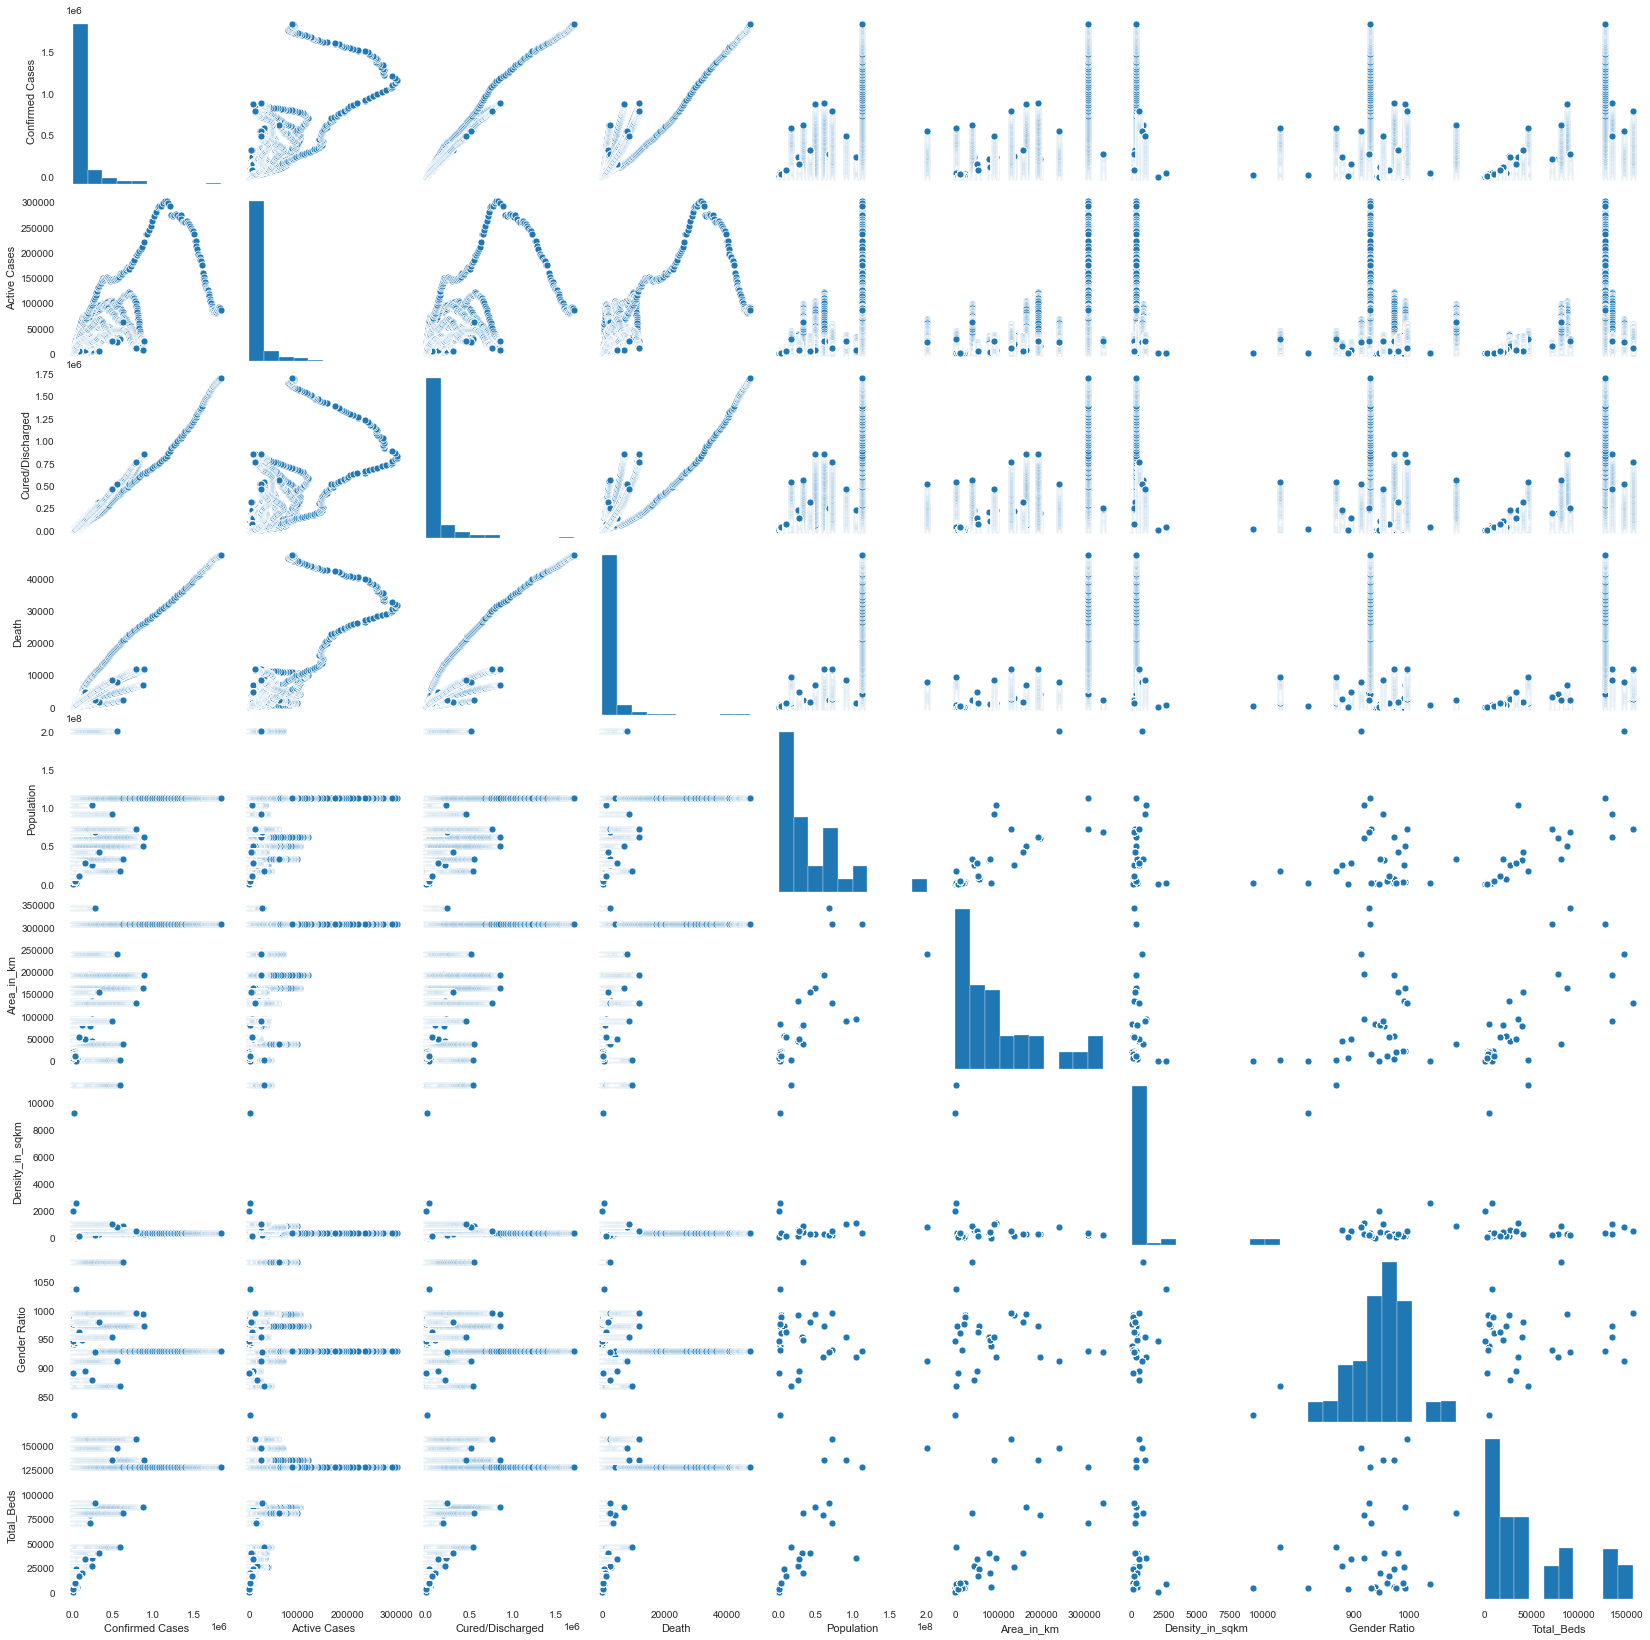

In [61]:
sns.pairplot(dfa)

In [62]:
#After Correlation and Pairplot,its best to use heat map to get integrated data

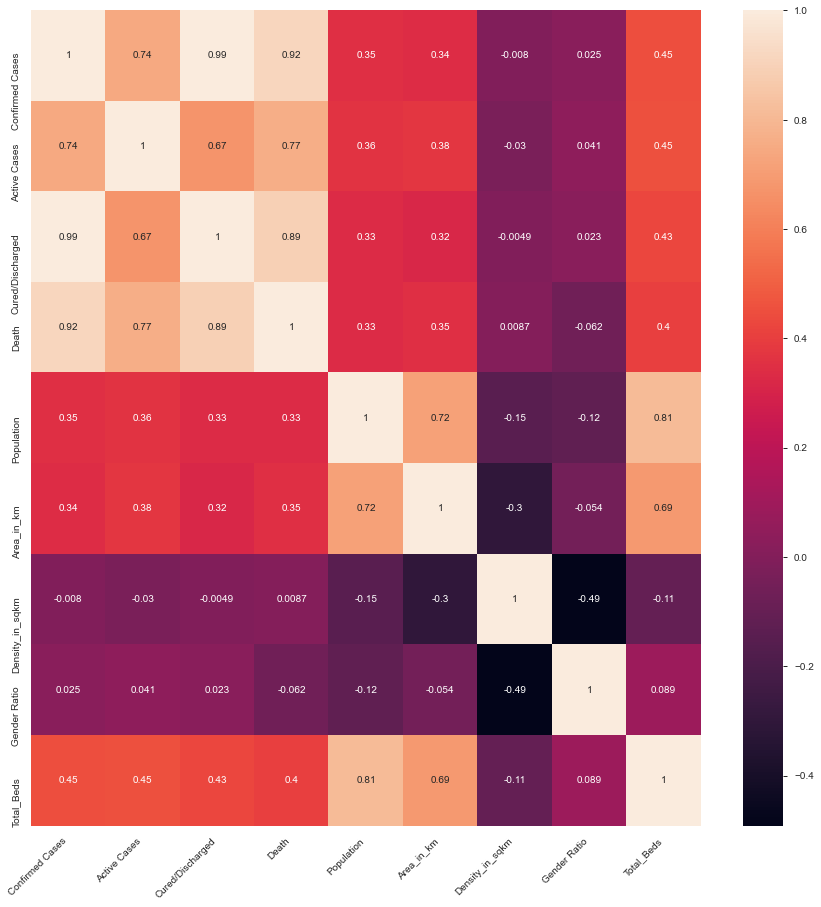

In [63]:
# Make a heatmap of the data 
plt.figure(figsize=(15,15))
hm = sns.heatmap(dfa.corr(), annot=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right');

In [64]:
#Now plotting for the columns which are highly correlated

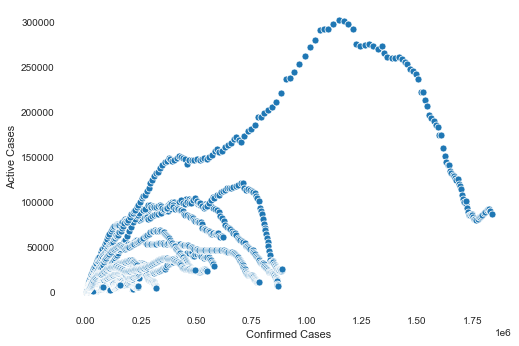

In [65]:
# Plot 
sns.scatterplot(x="Confirmed Cases", y="Active Cases", data=dfa)

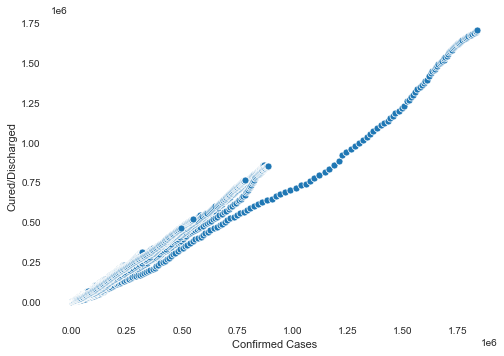

In [66]:
sns.scatterplot(x="Confirmed Cases", y="Cured/Discharged", data=dfa)

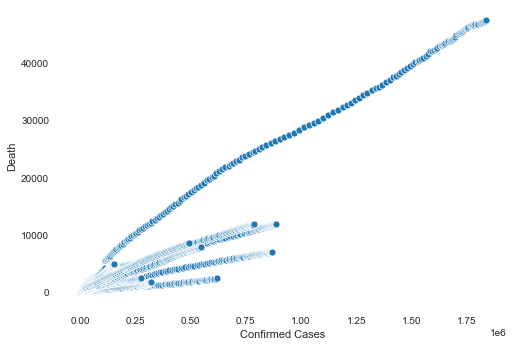

In [67]:
sns.scatterplot(x="Confirmed Cases", y="Death", data=dfa)

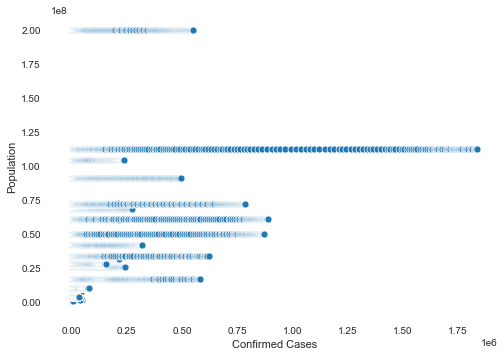

In [68]:
sns.scatterplot(x="Confirmed Cases", y="Population", data=dfa)

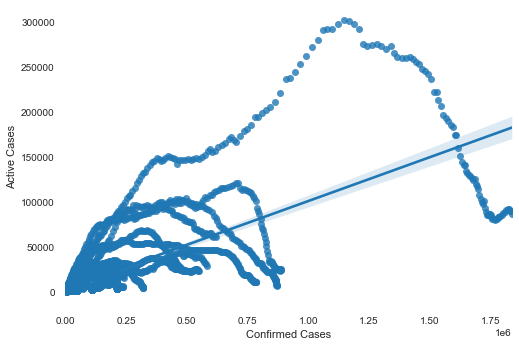

In [69]:
sns.regplot(x="Confirmed Cases", y="Active Cases", data=dfa)

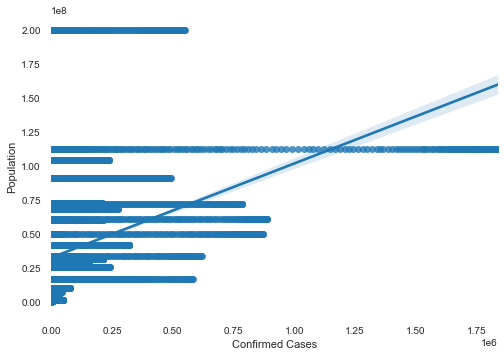

In [70]:
sns.regplot(x="Confirmed Cases", y="Population", data=dfa)

In [71]:
dfa.columns

Index(['Date', 'Region', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged',
       'Death', 'Population', 'Area_in_km', 'Density_in_sqkm', 'Gender Ratio',
       'Total_Beds', 'DensityBin'],
      dtype='object')

In [72]:
X = dfa[['Active Cases', 'Cured/Discharged',
       'Death']]
y = dfa['Confirmed Cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [73]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5842, 3) (5842,)
(1948, 3) (1948,)


In [74]:
from sklearn import linear_model, preprocessing

In [75]:
rModel = linear_model.LinearRegression(normalize=True)

In [76]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [77]:
rscore = rModel.score(X_train, y_train)

print("The R-Squared coefficent is: {}".format(rscore))

The R-Squared coefficent is: 1.0


In [78]:
y_pred = rModel.predict(X_test)

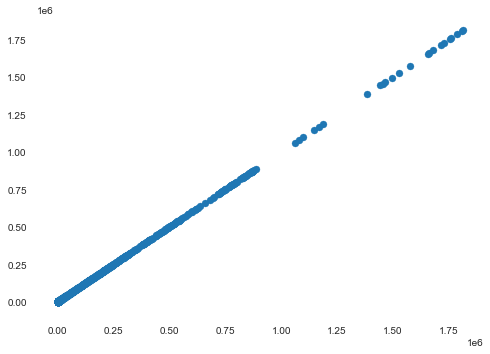

In [79]:
plt.scatter(y_test, y_pred)

In [80]:
dfa1=pd.get_dummies(dfa, columns=['DensityBin'],drop_first=True, prefix='C')

In [81]:
dfa1

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Area_in_km,Density_in_sqkm,Gender Ratio,Total_Beds,C_Mid,C_High
0,2020-03-12,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527,0,0
1,2020-03-13,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527,0,0
2,2020-03-14,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527,0,0
3,2020-03-15,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527,0,0
4,2020-03-16,Andhra Pradesh,1,1,0,0,49577103,162968,303.0,993,87527,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,2020-11-30,West Bengal,480813,24405,448032,8376,91276115,88752,1029.0,953,135105,0,1
7786,2020-12-01,West Bengal,483484,24298,450762,8424,91276115,88752,1029.0,953,135105,0,1
7787,2020-12-02,West Bengal,486799,24221,454102,8476,91276115,88752,1029.0,953,135105,0,1
7788,2020-12-03,West Bengal,490070,24166,457377,8527,91276115,88752,1029.0,953,135105,0,1


In [82]:
X1 = dfa1[['Active Cases', 'Cured/Discharged',
       'Death','Population','Area_in_km','Density_in_sqkm','C_Mid','C_High']]
y1 = dfa1['Confirmed Cases']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 123)

In [83]:
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(5842, 8) (5842,)
(1948, 8) (1948,)


In [84]:
rModel = linear_model.LinearRegression(normalize=True)

In [85]:
rModel.fit(X_train1, y_train1)

LinearRegression(normalize=True)

In [86]:
rscore = rModel.score(X_train1, y_train1)

print("The R-Squared coefficent is: {}".format(rscore))

The R-Squared coefficent is: 1.0


In [87]:
y_pred1 = rModel.predict(X_test1)

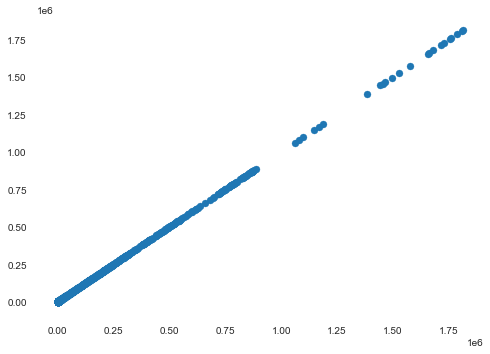

In [88]:
plt.scatter(y_test1, y_pred1)

In [89]:
dfa.columns

Index(['Date', 'Region', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged',
       'Death', 'Population', 'Area_in_km', 'Density_in_sqkm', 'Gender Ratio',
       'Total_Beds', 'DensityBin'],
      dtype='object')

In [90]:
X2 = dfa1.drop(['Confirmed Cases','Date','Region', 'Cured/Discharged',
       'Death'],axis=1)
y2 = dfa1['Confirmed Cases']
X_train2,X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 145)

In [91]:
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(5842, 8) (5842,)
(1948, 8) (1948,)


In [92]:
rModel = linear_model.LinearRegression(normalize=True)

In [93]:
rModel.fit(X_train2, y_train2)

LinearRegression(normalize=True)

In [94]:
rscore = rModel.score(X_train2, y_train2)

print("The R-Squared coefficent is: {}".format(rscore))

The R-Squared coefficent is: 0.5644877259397535


In [95]:
y_pred2 = rModel.predict(X_test2)

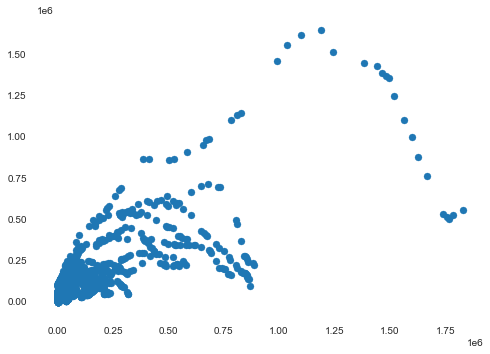

In [96]:
plt.scatter(y_test2, y_pred2)

In [97]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train2)
poly.fit(X_poly, y_train2)



PolynomialFeatures()

In [98]:
lin2 = linear_model.LinearRegression(normalize=True)

In [99]:
lin2.fit(X_poly, y_train2)

LinearRegression(normalize=True)

In [100]:
rscore = lin2.score(X_poly, y_train2)

In [101]:
print("The R-Squared coefficent is: {}".format(rscore))

The R-Squared coefficent is: 0.6157172623689846


In [102]:
X_poly1 = poly.fit_transform(X_test2)

In [103]:
y_pred2 = lin2.predict(X_poly1)

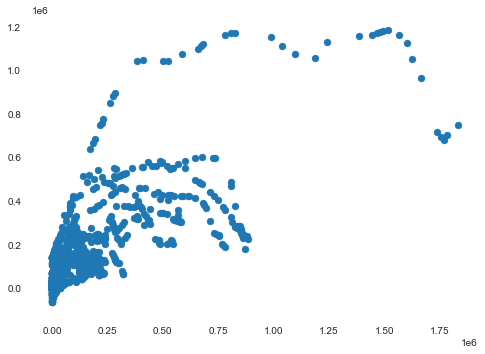

In [104]:
plt.scatter(y_test2, y_pred2)